In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
import warnings
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
warnings.filterwarnings('ignore')

In [21]:
df= pd.read_csv('sales.csv',index_col=[0])

In [22]:
df.shape

(400, 11)

In [23]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
1,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
2,111,48,16,260,83,Good,65,10,Yes,Yes,yes
3,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
4,117,100,4,466,97,Medium,55,14,Yes,Yes,no
5,141,64,3,340,128,Bad,38,13,Yes,No,no


In [24]:
#### Missing values
df.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
high           0
dtype: int64

In [25]:
### duplicates
df.duplicated().sum()

np.int64(0)

In [26]:
target=df[['high']]
features= df.drop(columns=['high'])
features.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [27]:
ord_enc=OrdinalEncoder()
features[[ 'ShelveLoc','Urban', 'US']]= ord_enc.fit_transform(features[[ 'ShelveLoc','Urban', 'US']])
features.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,138,73,11,276,120,0.0,42,17,1.0,1.0
2,111,48,16,260,83,1.0,65,10,1.0,1.0
3,113,35,10,269,80,2.0,59,12,1.0,1.0
4,117,100,4,466,97,2.0,55,14,1.0,1.0
5,141,64,3,340,128,0.0,38,13,1.0,0.0


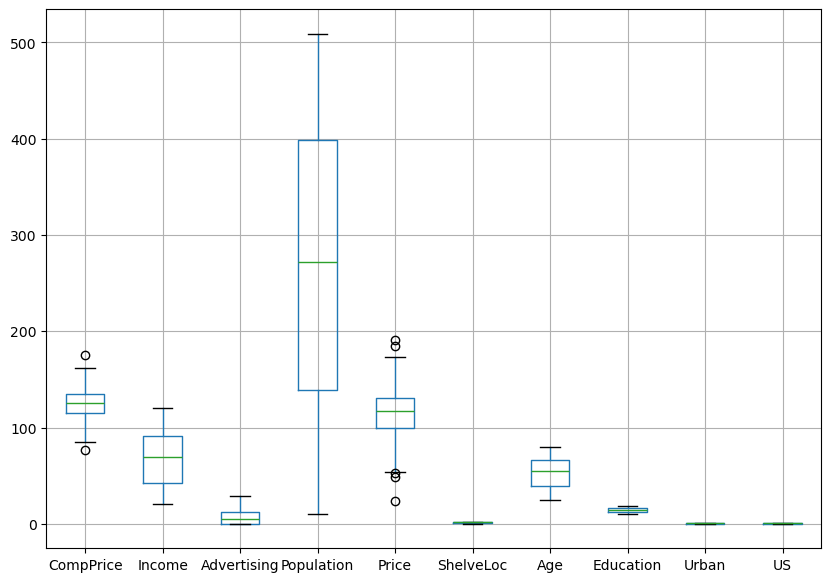

In [28]:
plt.figure(figsize=(10,7))
features.boxplot()
plt.show()

In [29]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)

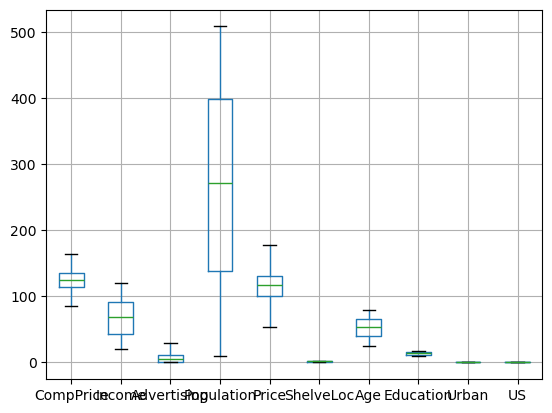

In [30]:
features.boxplot()
plt.show()

In [31]:
target.head()
target1=target.copy()
le= LabelEncoder()
target1=pd.DataFrame(le.fit_transform(target1),columns=target.columns)
target1.head()

,high
0,1
1,1
2,1
3,0
4,0


In [32]:
features.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,138.0,73,11,276,120.0,0.0,42,17,1.0,1.0
2,111.0,48,16,260,83.0,1.0,65,10,1.0,1.0
3,113.0,35,10,269,80.0,2.0,59,12,1.0,1.0
4,117.0,100,4,466,97.0,2.0,55,14,1.0,1.0
5,141.0,64,3,340,128.0,0.0,38,13,1.0,0.0


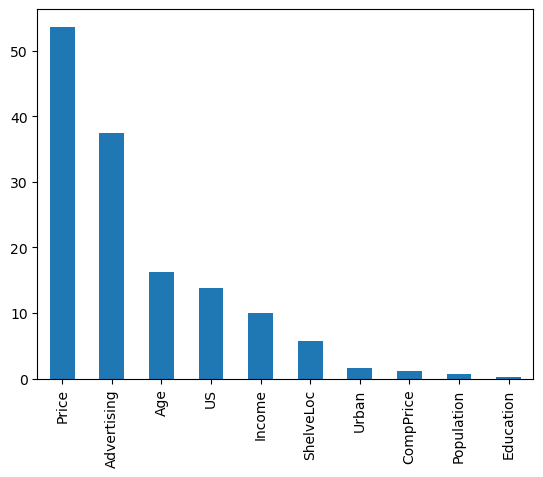

In [33]:
### feature selection
from sklearn.feature_selection import f_classif
f_class= f_classif(features,target1)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [34]:
features.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [35]:
features.drop(columns=['Population','Education'],inplace=True)
features.head()

,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Urban,US
1,138.0,73,11,120.0,0.0,42,1.0,1.0
2,111.0,48,16,83.0,1.0,65,1.0,1.0
3,113.0,35,10,80.0,2.0,59,1.0,1.0
4,117.0,100,4,97.0,2.0,55,1.0,1.0
5,141.0,64,3,128.0,0.0,38,1.0,0.0


In [36]:
x_train,x_test,y_train,y_test= train_test_split(features,target1,train_size=0.8,random_state=100,stratify=target1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 8)
(80, 8)
(320, 1)
(80, 1)


In [38]:
std_sca=StandardScaler()
x_train[['CompPrice', 'Income', 'Advertising', 'Price','Age']]=std_sca.fit_transform(x_train[['CompPrice', 'Income', 'Advertising', 'Price','Age']])
x_test[['CompPrice', 'Income', 'Advertising', 'Price','Age']]= std_sca.transform(x_test[['CompPrice', 'Income', 'Advertising', 'Price','Age']])

In [39]:
x_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc', 'Age',
       'Urban', 'US'],
      dtype='object')